### Monte Carlo Simulation of Profitability Likelihood

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df1 = pd.read_csv('inputprice.csv')
df2 = pd.read_csv('Linear Low Density Polyethylene Futures Historical Data.csv')
df2

,Date,Price,Open,High,Low,Vol.,Change %
0,14-Aug-22,7669.0,7840.0,7987.0,7592.0,134.07K,-0.05
1,7-Aug-22,8098.0,7808.0,7808.0,7808.0,0.06K,0.04
2,31-Jul-22,7784.0,8666.0,8666.0,8010.0,0.16K,-0.03
3,24-Jul-22,8064.0,7673.0,8212.0,7673.0,4.14K,0.05
4,17-Jul-22,7673.0,7655.0,8009.0,7540.0,1.41K,-0.01
...,...,...,...,...,...,...,...
540,5-Feb-12,9710.0,9745.0,9835.0,9710.0,0.33K,0.00
541,29-Jan-12,9755.0,9680.0,9845.0,9680.0,0.48K,0.02
542,15-Jan-12,9540.0,9190.0,9675.0,9100.0,3.44K,0.03
543,8-Jan-12,9235.0,9250.0,9365.0,9205.0,5.01K,0.00


In [4]:
df1['HDPE/brick'] = df1['HDPE price per kg'] * 0.1111
df1['Sand/brick'] = df1['Sand price per kg'] * 0.4444

hdpe_mean = df1['HDPE/brick'].mean()
sand_mean = df1['Sand/brick'].mean()

In [5]:
price_change = np.log(1+df2['Price'].pct_change())

In [6]:
price_change

0           NaN
1      0.054431
2     -0.039547
3      0.035339
4     -0.049702
         ...   
540    0.001030
541    0.004624
542   -0.022286
543   -0.032493
544    0.000000
Name: Price, Length: 545, dtype: float64

In [7]:
mu, sigma = price_change.mean(), price_change.std()

In [121]:
brickprice = 10
fixed_expense = 100000
variable_expense = 0.5
starting_demand = 100000
benchmark =  30000

In [94]:
sim_price = np.random.normal(mu, sigma, 260)
sim_demand = np.random.normal(0.000, 0.1/52, 260)


In [100]:
revenue = brickprice*starting_demand*(sim_demand + 1).cumprod()
expense = fixed_expense + (((variable_expense + sand_mean + ((hdpe_mean)*(sim_price + 1).cumprod())*starting_demand*(sim_demand + 1).cumprod())))

net = revenue - expense

In [125]:
num_simulations = 1000

yr1_profit = []
yr2_profit = []
yr3_profit = []
yr4_profit = []
yr5_profit = []

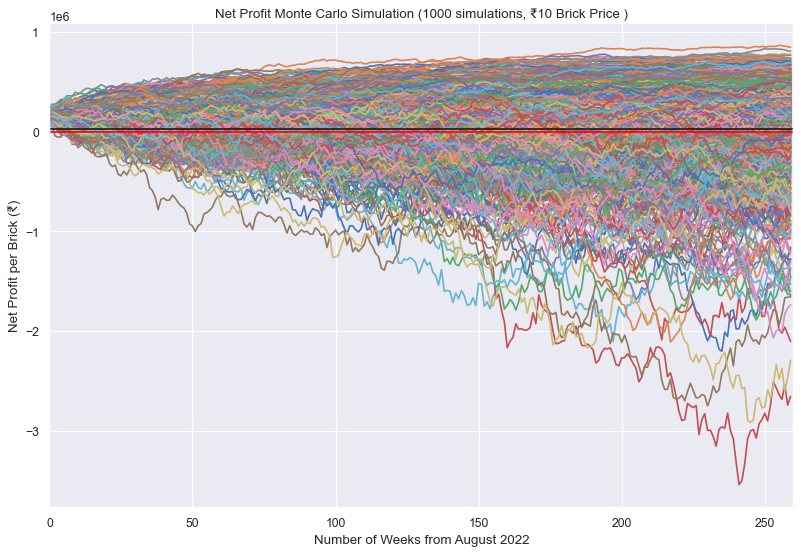

In [126]:
plt.figure(figsize=(12, 8), dpi=80)

for i in range(num_simulations):
    sim_price = np.random.normal(mu, sigma, 260)
    sim_demand = np.random.normal(0.000, 0.1/52, 260)
    revenue = brickprice*starting_demand*(sim_demand + 1).cumprod()
    expense = fixed_expense + (((variable_expense + sand_mean + ((hdpe_mean)*(sim_price + 1).cumprod())*starting_demand*(sim_demand + 1).cumprod())))

    net = revenue - expense
    
    yr1_profit.append(net[51])
    yr2_profit.append(net[103])
    yr3_profit.append(net[155])
    yr4_profit.append(net[207])
    yr5_profit.append(net[259])
    
    plt.title("Net Profit Monte Carlo Simulation (" + str(num_simulations) + " simulations, ₹10 Brick Price )")
    plt.xlabel("Number of Weeks from August 2022")
    plt.ylabel("Net Profit per Brick (₹)")
    plt.xlim([0, 260])
    plt.plot(net)
    
plt.axhline(0, c='red')
plt.axhline(benchmark, c='k')

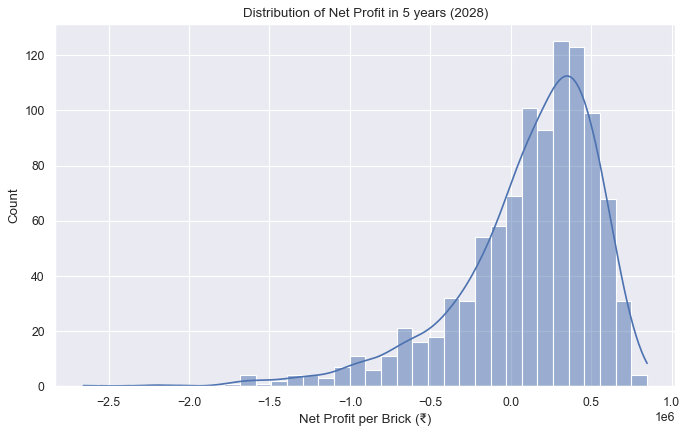

In [127]:
import seaborn as sns

plt.figure(figsize=(10, 6), dpi=80)
sns.set(style="darkgrid")
sns.histplot(yr5_profit, kde=True)
plt.title("Distribution of Net Profit in 5 years (2028)")
plt.xlabel("Net Profit per Brick (₹)")
plt.show()

In [128]:
from statistics import median
prob1 = (sum(x > 0 for x in yr1_profit)/len(yr1_profit))
prob2 = (sum(x > 0 for x in yr2_profit)/len(yr2_profit))
prob3 = (sum(x > 0 for x in yr3_profit)/len(yr3_profit))
prob4 = (sum(x > 0 for x in yr4_profit)/len(yr4_profit))
prob5 = (sum(x > 0 for x in yr5_profit)/len(yr5_profit))

In [129]:
print("The probability of profit is:")
print("Year 1: " + str(prob1*100) + "%")
print("Year 2: " + str(prob2*100) + "%")
print("Year 3: " + str(prob3*100) + "%")
print("Year 4: " + str(prob4*100) + "%")
print("Year 5: " + str(prob5*100) + "%")
print("Probability of staying profitable all 5 yrs: " + str(prob1*prob2*prob3*prob4*prob5*100)  + "%")

The probability of profit is:
Year 1: 82.89999999999999%
Year 2: 76.3%
Year 3: 71.8%
Year 4: 69.39999999999999%
Year 5: 69.39999999999999%
Probability of staying profitable all 5 yrs: 21.873710185549594%


In [133]:
prob1a = (sum(x > benchmark for x in yr1_profit)/len(yr1_profit))
prob2a = (sum(x > benchmark for x in yr2_profit)/len(yr2_profit))
prob3a = (sum(x > benchmark for x in yr3_profit)/len(yr3_profit))
prob4a = (sum(x > benchmark for x in yr4_profit)/len(yr4_profit))
prob5a = (sum(x > benchmark for x in yr5_profit)/len(yr5_profit))

In [134]:
print("The probability of profit above 3% benchmark is:")
print("Year 1: " + str(prob1a*100) + "%")
print("Year 2: " + str(prob2a*100) + "%")
print("Year 3: " + str(prob3a*100) + "%")
print("Year 4: " + str(prob4a*100) + "%")
print("Year 5: " + str(prob5a*100) + "%")
print("Probability of staying profitable above 3% benchmark all 5 yrs: " + str(prob1a*prob2a*prob3a*prob4a*prob5a*100)  + "%")

The probability of profit above 3% benchmark is:
Year 1: 78.2%
Year 2: 72.6%
Year 3: 69.6%
Year 4: 67.0%
Year 5: 67.2%
Probability of staying profitable above 3% benchmark all 5 yrs: 17.790849635328005%


In [135]:
print("Most likely profit per brick in:")
print("Year 1: $" + str(median(yr1_profit)))
print("Year 2: $" + str(median(yr2_profit)))
print("Year 3: $" + str(median(yr3_profit)))
print("Year 4: $" + str(median(yr4_profit)))
print("Year 5: $" + str(median(yr5_profit)))

Most likely profit per brick in:
Year 1: $172475.65416128404
Year 2: $192597.71034678374
Year 3: $195896.91312087607
Year 4: $208077.30354248855
Year 5: $213844.59233559627
